## Used car price prediction

### Content

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1)name
2)year
3)selling_price
4)present price
5)km_driven
6)fuel
7)seller_type
8)transmission
9)Owner

## Importing libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

Here we can see that our dataset has 301 observations and 9 variables

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Here we can observe that there are 4 categorical variables and rest are numerical variables

In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Here we can observe that there are no missing values in the dataset

In [7]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the Categorical Data


In [8]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Exploratory Data Analysis

### Distribution Plot

<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

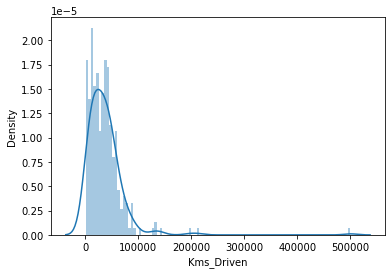

In [10]:
sns.distplot(car_dataset['Kms_Driven'],bins=100)

Here we can observe that the distribution curve fits well with the response variable

### Scatter Plot

<AxesSubplot:xlabel='[Year]', ylabel='[Selling_Price]'>

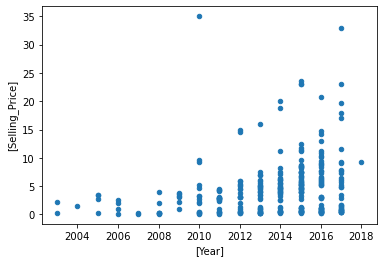

In [17]:
## plot between year and selling price
car_dataset.plot.scatter(['Year'],['Selling_Price'])

Here we can observe that as the year increases selling price increases

## Pairplot

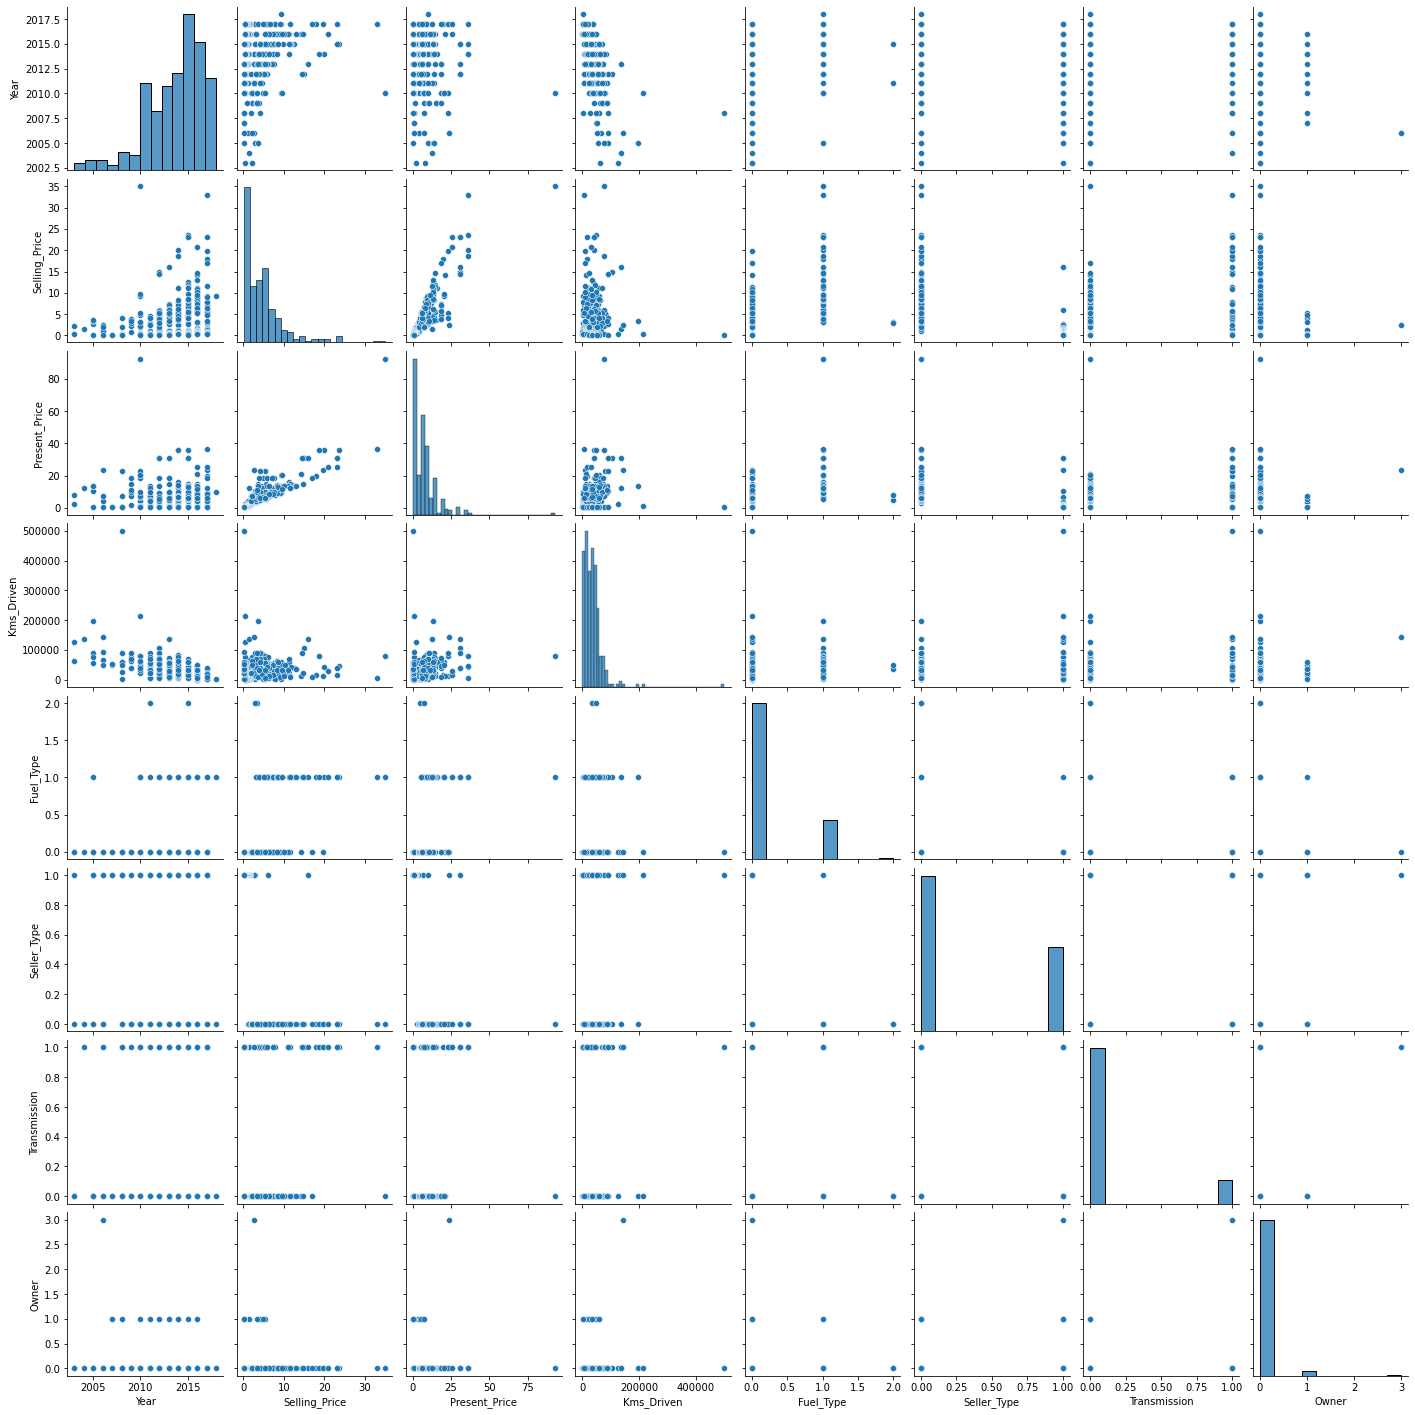

In [18]:
## lets plot a pairplot to understand the relationship between features and label

sns.pairplot(car_dataset)

Here we observe that features such as Kms_Driven,Present_price and year has linear relationship with selling price

## Splitting the data into features and labels

In [19]:
## splitting the dataset and dropping the categorical variable Car_Name as it is not relevant for our analysis

X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [20]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

## Splitting train and test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

### Model Training

### Linear Regression

In [22]:
 #loading the linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Model evaluation

In [24]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
# R squared
score = metrics.r2_score(Y_train, training_data_prediction)
print("R square : ",score)

R square :  0.8799451660493715


In [30]:
mse=mean_squared_error(Y_train, training_data_prediction)
rmse=sqrt(mean_squared_error(Y_train, training_data_prediction))
print(mse)
print(rmse)

3.2590308233090766
1.8052785999144498


### Visualize the actual prices and Predicted prices

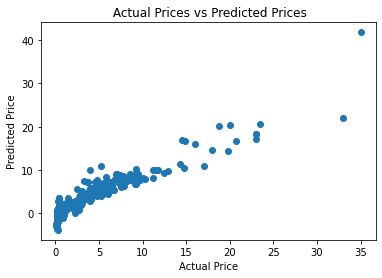

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Here we can observe that most of the data points are closer to each other so we can say that our model is giving good prediction in case of training data

In [28]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [29]:
# R squared
score = metrics.r2_score(Y_test, test_data_prediction)
print("R square : ",score)

R square :  0.8365766715025809


In [33]:
mse=mean_squared_error(Y_test, test_data_prediction)
rmse=sqrt(mean_squared_error(Y_test, test_data_prediction))
print(mse)
print(rmse)

2.150129918985265
1.4663321311985442


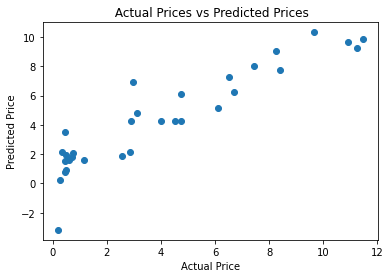

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Here we can observe that error rate is decresing and the pattern is linear so we can say that the model is performing well